In [4]:
%matplotlib inline

import sys; sys.path.append("/data/miguel/practicum/DL-Medical-Physics")
from core import *
from train_functions import cos_annealing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from pathlib2 import Path

PATH = Path('data/')

# Metadata

In [ ]:
# To balance validation and testing
def decode_labels(df_col):
    return np.array(list(map(np.array, df_col.str.split(' ')))).astype(int)


train_df = pd.read_csv(PATH/'train_df.csv')
valid_df = pd.read_csv(PATH/"val_df.csv")
test_df = pd.read_csv(PATH/"test_df.csv")

print('Emphysema')
IDX = 10 # Emphysema
print(f'train: {decode_labels(train_df.Label)[:,IDX].sum()}')
print(f'validation: {decode_labels(valid_df.Label)[:,IDX].sum()}')
print(f'test: {decode_labels(test_df.Label)[:,IDX].sum()}')
print(f'Total: {decode_labels(train_df.Label)[:,IDX].sum()+decode_labels(valid_df.Label)[:,IDX].sum()+decode_labels(test_df.Label)[:,IDX].sum()}')

print('\nHernia')
IDX = 13 # Hernia
print(f'train: {decode_labels(train_df.Label)[:,IDX].sum()}')
print(f'validation: {decode_labels(valid_df.Label)[:,IDX].sum()}')
print(f'test: {decode_labels(test_df.Label)[:,IDX].sum()}')
print(f'Total: {decode_labels(train_df.Label)[:,IDX].sum()+decode_labels(valid_df.Label)[:,IDX].sum()+decode_labels(test_df.Label)[:,IDX].sum()}')

print('\nPneumonia')
IDX = 6 # Pneumonia
print(f'train: {decode_labels(train_df.Label)[:,IDX].sum()}')
print(f'validation: {decode_labels(valid_df.Label)[:,IDX].sum()}')
print(f'test: {decode_labels(test_df.Label)[:,IDX].sum()}')
print(f'Total: {decode_labels(train_df.Label)[:,IDX].sum()+decode_labels(valid_df.Label)[:,IDX].sum()+decode_labels(test_df.Label)[:,IDX].sum()}')

# Methods and Materials

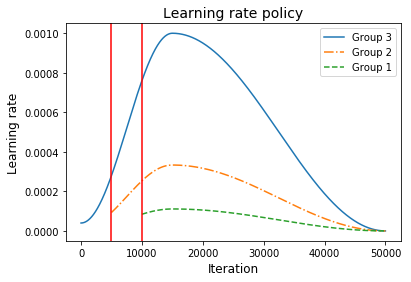

In [35]:
# Construct policy
N = 50_000 
lr = np.concatenate([cos_annealing(1e-3/25, 1e-3, int(N*.3)),
                    cos_annealing(1e-3, (1e-3/25)*1e-4, N-int(N*.3))]
                   )
# Ploting
x = range(N)
plt.plot(x, lr, label='Group 3')
plt.plot(x[int(.1*N):], lr[int(.1*N):]/3, '-.',  markersize=1, label='Group 2')
plt.axvline(int(.1*N), color='red')
plt.plot(x[int(.2*N):], lr[int(.2*N):]/9, '--', label='Group 1')
plt.axvline(int(.2*N), color='red')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Learning rate', fontsize=12)
plt.title('Learning rate policy', fontsize=14)
plt.legend()
plt.show()

# All data

In [60]:
df = pd.read_csv(PATH/'all_data_overview/naive_DL_traditional_methods.csv')

In [61]:
df.model.unique()

array(['DenseNet121', 'ridge'], dtype=object)

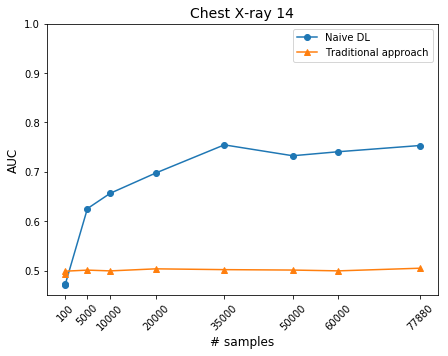

In [64]:
plt.figure(figsize=(7,5))
x = [50, 100, 5_000, 10_000, 20_000, 35_000, 50_000, 60_000, 77_880]
plt.plot(x, df[df['model']=='DenseNet121']['auc'], '-o', label='Naive DL')
plt.plot(x, df[df['model']=='ridge']['auc'], '-^', label='Traditional approach')
plt.xticks([100, 5_000, 10_000, 20_000, 35_000, 50_000, 60_000, 77_880] ,rotation=45)
plt.legend(loc='best')
plt.ylim(.45,1)
plt.xlabel('# samples', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.title('Chest X-ray 14', fontsize=14)
plt.show()

# Small data: Naive DL vs traditional methods

In [13]:
df = pd.read_csv(PATH/'small-data-naive-approach/naive_DL_vs_traditional_chestxray14.csv')
df2 = pd.read_csv(PATH/'small-data-naive-approach/naive_DL_vs_traditional_pneumonia.csv')

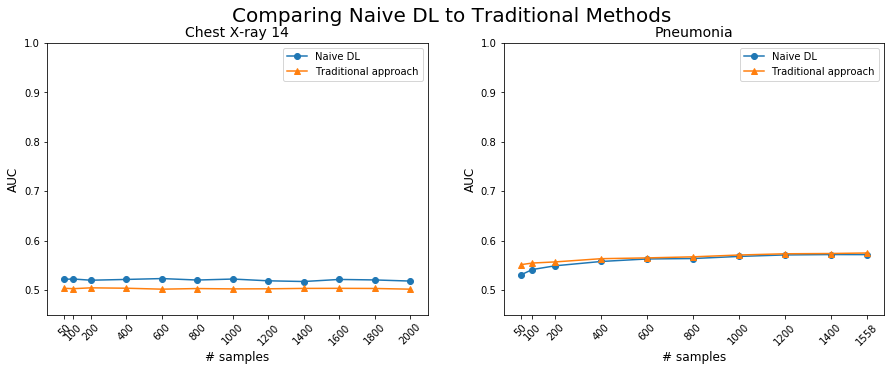

In [24]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Comparing Naive DL to Traditional Methods', fontsize=20)

plt.subplot(1,2,1)
x = [50,100,200,400,600,800,1000,1200,1400,1600,1800, 2000]
plt.plot(x, df[df['model']=='Densnet121']['mean'], '-o', label='Naive DL')
plt.plot(x, df[df['model']=='Ridge']['mean'], '-^', label='Traditional approach')
plt.xticks(x ,rotation=45)
plt.legend(loc='best')
plt.ylim(.45,1)
plt.xlabel('# samples', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.title('Chest X-ray 14', fontsize=14)

plt.subplot(1,2,2)
x = [50,100,200,400,600,800,1000,1200,1400,1558]
plt.plot(x, df2[df2['model']=='Densnet121']['mean'], '-o', label='Naive DL')
plt.plot(x, df2[df2['model']=='Ridge']['mean'], '-^', label='Traditional approach')
plt.xticks(x ,rotation=45)
plt.legend(loc='best')
plt.ylim(.45,1)
plt.xlabel('# samples', fontsize=12)
plt.ylabel('AUC', fontsize=12)
plt.title('Pneumonia', fontsize=14)
plt.show()

# Training techniques

In [15]:
! ls ../training_methods/results/

chestxray14_one_cycle_training.json  pneumonia_one_cycle_training.json
chestxray14_regular_training.json    pneumonia_regular_training.json


In [16]:
x = [50,100,200,400,600,800,1000,1200,1400,1600,1800, 2000]

with open('../training_methods/results/chestxray14_one_cycle_training.json') as jfile:
    chest14_one_cycle = json.load(jfile)
with open('../training_methods/results/chestxray14_regular_training.json') as jfile:
    chest14_regular = json.load(jfile)
    
with open('../training_methods/results/pneumonia_one_cycle_training.json') as jfile:
    pneumonia_one_cycle = json.load(jfile)
with open('../training_methods/results/pneumonia_regular_training.json') as jfile:
    pneumonia_regular = json.load(jfile)

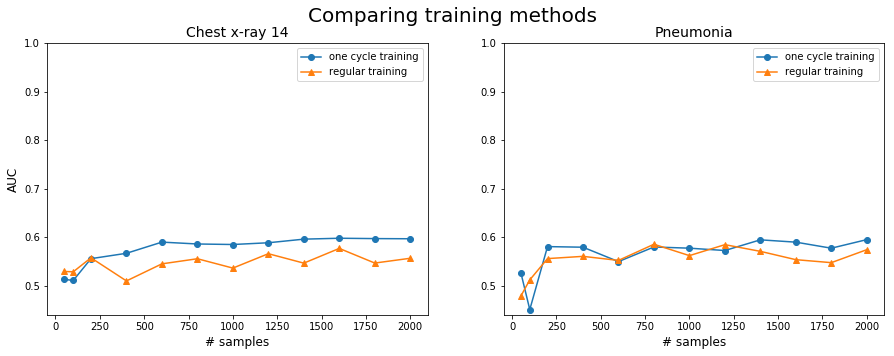

In [17]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Comparing training methods', fontsize=20)

plt.subplot(1,2,1)
plt.plot(x, chest14_one_cycle['aucs'], '-o', label='one cycle training')
plt.plot(x, chest14_regular['aucs'], '-^', label='regular training')
plt.legend()
plt.ylim(.44,1)
plt.title('Chest x-ray 14', fontsize=14)
plt.ylabel('AUC', fontsize=12)
plt.xlabel('# samples', fontsize=12)

plt.subplot(1,2,2)
plt.plot(x, pneumonia_one_cycle['aucs'], '-o', label='one cycle training')
plt.plot(x, pneumonia_regular['aucs'], '-^', label='regular training')
plt.legend()
plt.ylim(.44,1)
plt.title('Pneumonia', fontsize=14)
plt.xlabel('# samples', fontsize=12)
plt.show()

# Transfer learning methods

In [18]:
! ls ../transfer_learning_methods/results/

chestxray14_feature_extractor.json  pneumonia_feature_extractor.json
chestxray14_fine_tune_all.json	    pneumonia_fine_tune_all.json
chestxray14_grad_unfr_diff_lr.json  pneumonia_grad_unfr_diff_lr.json


In [19]:
x = [50,100,200,400,600,800,1000,1200,1400,1600,1800, 2000]

with open('../transfer_learning_methods/results/chestxray14_feature_extractor.json') as jfile:
    chest14_feature_extractor = json.load(jfile)
with open('../transfer_learning_methods/results/chestxray14_fine_tune_all.json') as jfile:
    chest14_fine_tune_all = json.load(jfile)
with open('../transfer_learning_methods/results/chestxray14_grad_unfr_diff_lr.json') as jfile:
    chest14_grad_unfr_diff_lr = json.load(jfile)
    
with open('../transfer_learning_methods/results/pneumonia_feature_extractor.json') as jfile:
    pneumonia_feature_extractor = json.load(jfile)
with open('../transfer_learning_methods/results/pneumonia_fine_tune_all.json') as jfile:
    pneumonia_fine_tune_all = json.load(jfile)
with open('../transfer_learning_methods/results/pneumonia_grad_unfr_diff_lr.json') as jfile:
    pneumonia_grad_unfr_diff_lr = json.load(jfile)

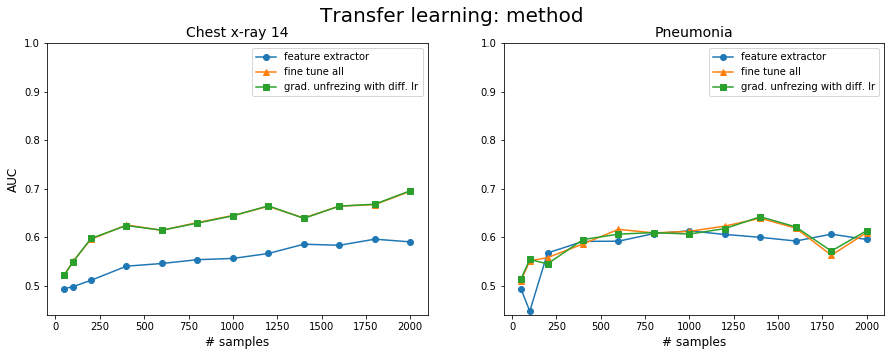

In [20]:
fig = plt.figure(figsize=(15,5))
fig.suptitle('Transfer learning: method', fontsize=20)

plt.subplot(1,2,1)
plt.plot(x, chest14_feature_extractor['aucs'], '-o', label='feature extractor')
plt.plot(x, chest14_fine_tune_all['aucs'], '-^', label='fine tune all')
plt.plot(x, chest14_grad_unfr_diff_lr['aucs'], '-s', label='grad. unfrezing with diff. lr')
plt.legend()
plt.ylim(.44,1)
plt.title('Chest x-ray 14', fontsize=14)
plt.ylabel('AUC', fontsize=12)
plt.xlabel('# samples', fontsize=12)

plt.subplot(1,2,2)
plt.plot(x, pneumonia_feature_extractor['aucs'], '-o', label='feature extractor')
plt.plot(x, pneumonia_fine_tune_all['aucs'], '-^', label='fine tune all')
plt.plot(x, pneumonia_grad_unfr_diff_lr['aucs'], '-s', label='grad. unfrezing with diff. lr')
plt.legend()
plt.ylim(.44,1)
plt.title('Pneumonia', fontsize=14)
plt.xlabel('# samples', fontsize=12)

plt.show()

# Transfer learning datasets

In [15]:
! ls ../transfer_learning_dataset/data_plots

13diseases.json		 imagenet.json		  MURA_small.json
13diseases_small.json	 imagenet_pneumonia.json  no_pretrained_hernia.json
chexpert_hernia.json	 imagenet_small.json	  no_pretrained.json
chexpert.json		 MURA_hernia.json	  no_pretrained_pneumonia.json
chexpert_pneumonia.json  MURA.json		  no_pretrained_small.json
imagenet_hernia.json	 MURA_pneumonia.json


In [16]:
x = [50,100,200,400,600,800,1000,1200,1400,1600,1800, 2000]

with open('../transfer_learning_dataset/data_plots/13diseases.json') as jfile:
    emphysema_13diseases = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/chexpert.json') as jfile:
    emphysema_chexpert = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/MURA.json') as jfile:
    emphysema_MURA = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/imagenet.json') as jfile:
    emphysema_imagenet = json.load(jfile)
with open('../transfer_learning_dataset/data_plots/no_pretrained.json') as jfile:
    emphysema_no_pretrained = json.load(jfile)

DISEASE = 'Pneumonia'
with open(f'../transfer_learning_dataset/data_plots/chexpert_{DISEASE.lower()}.json') as jfile:
    pneumonia_chexpert = json.load(jfile)
with open(f'../transfer_learning_dataset/data_plots/MURA_{DISEASE.lower()}.json') as jfile:
    pneumonia_MURA = json.load(jfile)
with open(f'../transfer_learning_dataset/data_plots/imagenet_{DISEASE.lower()}.json') as jfile:
    pneumonia_imagenet = json.load(jfile)
with open(f'../transfer_learning_dataset/data_plots/no_pretrained_{DISEASE.lower()}.json') as jfile:
    pneumonia_no_pretrained = json.load(jfile)

DISEASE = 'Hernia'
with open(f'../transfer_learning_dataset/data_plots/chexpert_{DISEASE.lower()}.json') as jfile:
    hernia_chexpert = json.load(jfile)
with open(f'../transfer_learning_dataset/data_plots/MURA_{DISEASE.lower()}.json') as jfile:
    hernia_MURA = json.load(jfile)
with open(f'../transfer_learning_dataset/data_plots/imagenet_{DISEASE.lower()}.json') as jfile:
    hernia_imagenet = json.load(jfile)
with open(f'../transfer_learning_dataset/data_plots/no_pretrained_{DISEASE.lower()}.json') as jfile:
    hernia_no_pretrained = json.load(jfile)

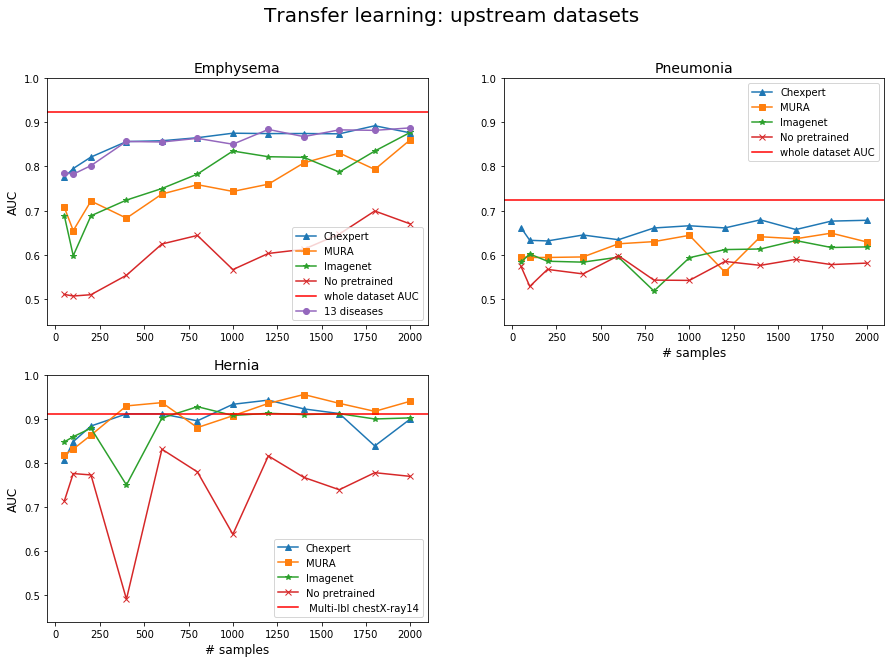

In [17]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Transfer learning: upstream datasets', fontsize=20)

plt.subplot(2,2,1)

plt.plot(x, emphysema_chexpert['auc'], '-^', label='Chexpert')
plt.plot(x, emphysema_MURA['auc'], '-s', label='MURA')
plt.plot(x, emphysema_imagenet['auc'], '-*', label='Imagenet')
plt.plot(x, emphysema_no_pretrained['auc'], '-x', label='No pretrained')
plt.axhline(.923, color='red', label='whole dataset AUC')
plt.plot(x, emphysema_13diseases['auc'], '-o', label='13 diseases')

plt.legend()
plt.ylim(.44,1)
plt.title('Emphysema', fontsize=14)
plt.ylabel('AUC', fontsize=12)
# plt.xlabel('# samples', fontsize=12)

plt.subplot(2,2,2)
plt.plot(x, pneumonia_chexpert['auc'], '-^', label='Chexpert')
plt.plot(x, pneumonia_MURA['auc'], '-s', label='MURA')
plt.plot(x, pneumonia_imagenet['auc'], '-*', label='Imagenet')
plt.plot(x, pneumonia_no_pretrained['auc'], '-x', label='No pretrained')
plt.axhline(.725, color='red', label='whole dataset AUC')
plt.legend()
plt.ylim(.44,1)
plt.title('Pneumonia', fontsize=14)
plt.xlabel('# samples', fontsize=12)

plt.subplot(2,2,3)
plt.plot(x, hernia_chexpert['auc'], '-^', label='Chexpert')
plt.plot(x, hernia_MURA['auc'], '-s', label='MURA')
plt.plot(x, hernia_imagenet['auc'], '-*', label='Imagenet')
plt.plot(x, hernia_no_pretrained['auc'], '-x', label='No pretrained')
plt.axhline(.912, color='red', label=' Multi-lbl chestX-ray14')
plt.legend()
plt.ylim(.44,1)
plt.title('Hernia', fontsize=14)
plt.xlabel('# samples', fontsize=12)
plt.ylabel('AUC', fontsize=12)

plt.show()

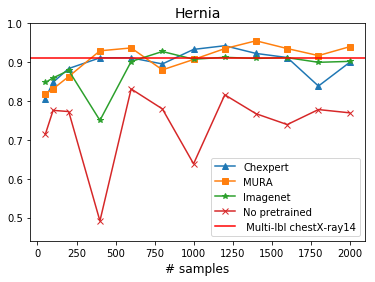

In [11]:
plt.plot(x, hernia_chexpert['auc'], '-^', label='Chexpert')
plt.plot(x, hernia_MURA['auc'], '-s', label='MURA')
plt.plot(x, hernia_imagenet['auc'], '-*', label='Imagenet')
plt.plot(x, hernia_no_pretrained['auc'], '-x', label='No pretrained')
plt.axhline(.912, color='red', label=' Multi-lbl chestX-ray14')
plt.legend()
plt.ylim(.44,1)
plt.title('Hernia', fontsize=14)
plt.xlabel('# samples', fontsize=12)

plt.show()

# Results using the whole chest x ray and the proper training

In [20]:
test_dl = DataBatches(test_df,img_folder_path=img_folder_path,
                  transforms = False, shuffle = False, data=data,
                  batch_size = batch_size, normalize=pretrained)
validate(model, test_dl)

(0.20191780040408833,
 0.8164163548894331,
 [0.7777638937179043,
  0.8882716944725164,
  0.8331421478637311,
  0.6839344107757633,
  0.8366145269199207,
  0.7661666072832656,
  0.7252368098300768,
  0.8640024568362074,
  0.752993899915239,
  0.8507316063175169,
  0.9233914222053733,
  0.8275160380939851,
  0.7879706132917902,
  0.9120928409287741])

In [ ]:
idx2tgt = [ 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia',
               'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']